# Step 0: Import Necessary Libraries

In [3]:

%pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("--- Libraries Imported Successfully ---")

Note: you may need to restart the kernel to use updated packages.
--- Libraries Imported Successfully ---


# Step 1: Data Loading and Quality Check

In [4]:

print("\n--- Step 1: Data Loading and Quality Check ---")
try:
    df = pd.read_csv('HR_comma_sep.csv')
    print("Dataset loaded successfully!")
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nMissing Values Check:")
    print(df.isnull().sum())
    if df.isnull().sum().sum() == 0:
        print("\nConclusion: No missing values found.")
    else:
        print(f"\nConclusion: Found {df.isnull().sum().sum()} missing values.")
except FileNotFoundError:
    print("\nError: 'HR_comma_sep.csv' not found. Please check the file path.")
    exit()


--- Step 1: Data Loading and Quality Check ---
Dataset loaded successfully!

First 5 Rows:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1     

# Step 2: Exploratory Data Analysis (EDA)


--- Step 2: Exploratory Data Analysis (EDA) ---

Generating Correlation Heatmap...


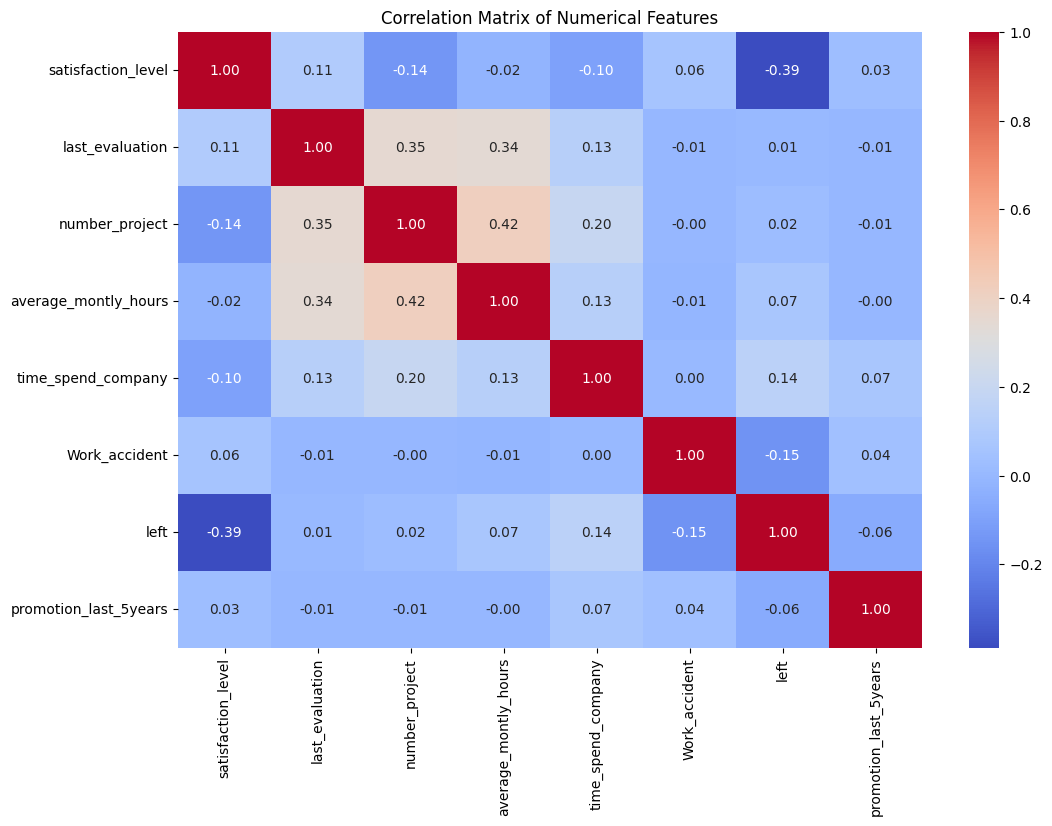

Generating Distribution Plots...


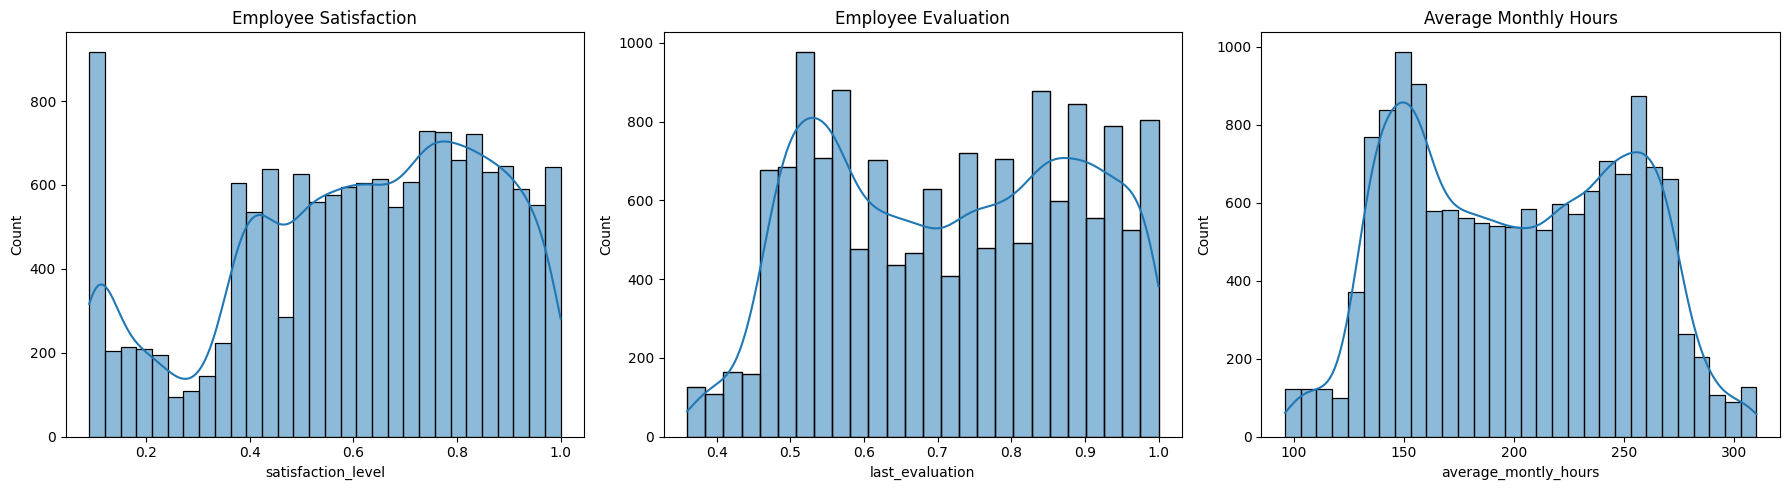

Generating Employee Project Count Plot...


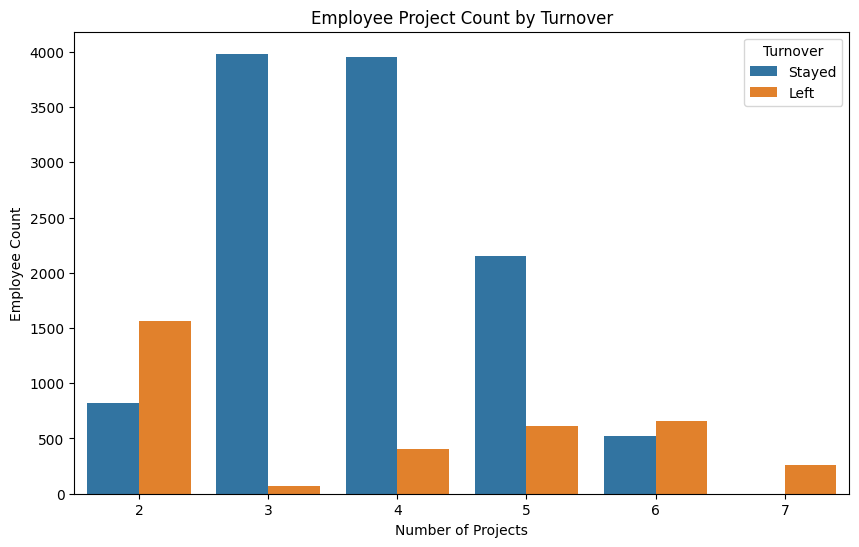

Inference: Employees with 2, 6, and 7 projects show high turnover. Those with 3-5 projects are more likely to stay.


In [ ]:
if 'df' not in globals():
	raise NameError("The variable 'df' is not defined. Please run the cell that loads the data first.")

print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

# 2.1. Correlation Matrix Heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2.2. Distribution Plots
print("Generating Distribution Plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['satisfaction_level'], kde=True, ax=axes[0]).set_title('Employee Satisfaction')
sns.histplot(df['last_evaluation'], kde=True, ax=axes[1]).set_title('Employee Evaluation')
sns.histplot(df['average_montly_hours'], kde=True, ax=axes[2]).set_title('Average Monthly Hours')
plt.tight_layout()
plt.show()

# 2.3. Employee Project Count
print("Generating Employee Project Count Plot...")
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Employee Project Count by Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.legend(title='Turnover', labels=['Stayed', 'Left'])
plt.show()
print("Inference: Employees with 2, 6, and 7 projects show high turnover. Those with 3-5 projects are more likely to stay.")


# Step 3: Clustering of Employees Who Left


--- Step 3: Clustering of Employees Who Left ---


c:\Users\ThapeloMasebe\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ThapeloMasebe\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ThapeloMasebe\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ThapeloMasebe\AppData\Local\Programs\Python\Python3

Generating Cluster Plot...


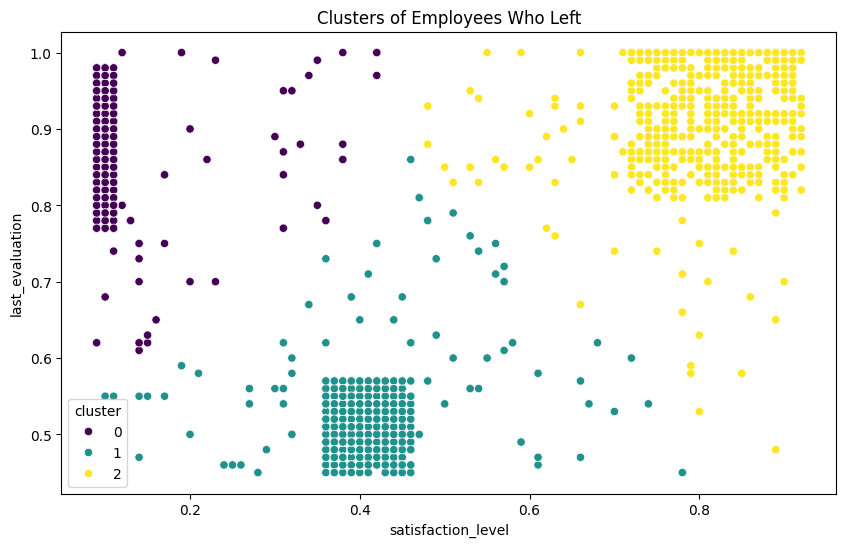

Cluster Thoughts: The clusters likely represent (1) Unhappy & Underperforming, (2) Unhappy & High-Performing, and (3) Happy & High-Performing (left for better opportunities).


In [ ]:
print("\n--- Step 3: Clustering of Employees Who Left ---")
left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

print("Generating Cluster Plot...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='viridis')
plt.title('Clusters of Employees Who Left')
plt.show()
print("Cluster Thoughts: The clusters likely represent (1) Unhappy & Underperforming, (2) Unhappy & High-Performing, and (3) Happy & High-Performing (left for better opportunities).")

# Step 4: Pre-processing and Handling Class Imbalance

In [ ]:
print("\n--- Step 4: Pre-processing and Handling Class Imbalance ---")
df_processed = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)
X = df_processed.drop('left', axis=1)
y = df_processed['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print("Class distribution before SMOTE:\n", y_train.value_counts())
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nClass distribution after SMOTE:\n", y_train_smote.value_counts())

# Scale features for models that require it (like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)



--- Step 4: Pre-processing and Handling Class Imbalance ---
Class distribution before SMOTE:
 left
0    9142
1    2857
Name: count, dtype: int64

Class distribution after SMOTE:
 left
0    9142
1    9142
Name: count, dtype: int64


# Step 5 & 6: Model Training, Evaluation, and Selection


--- Step 5 & 6: Model Training, Evaluation, and Selection ---

--- Training and Evaluating Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



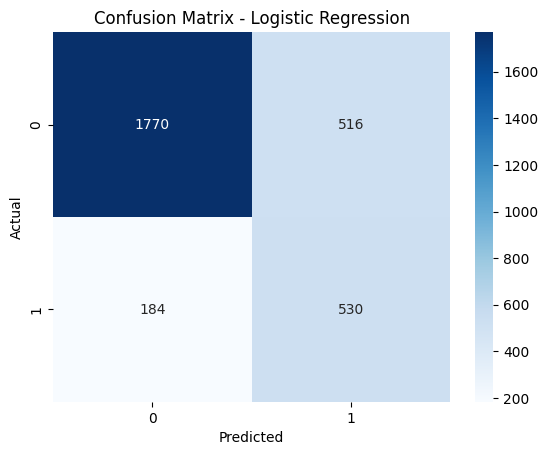


--- Training and Evaluating Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



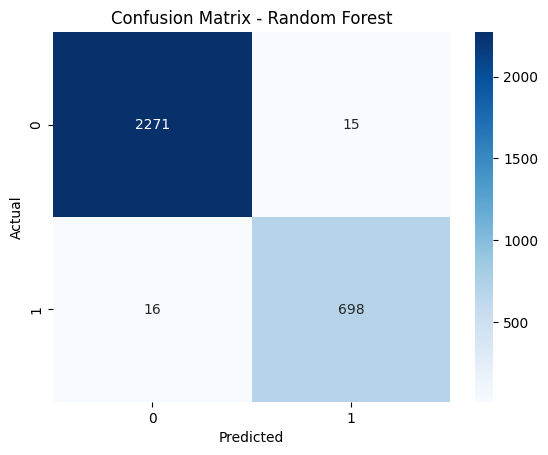


--- Training and Evaluating Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



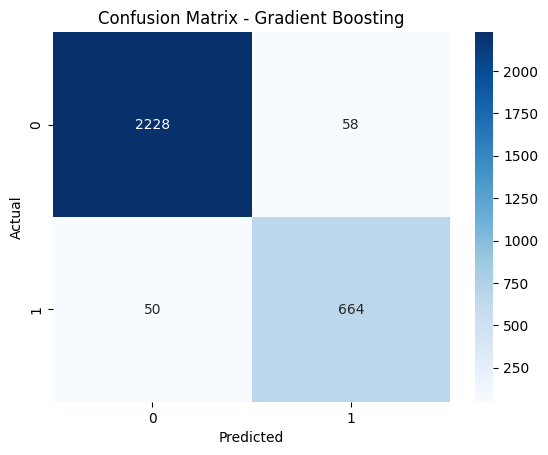


--- Metric Justification ---
Recall is the most important metric here. The cost of failing to identify an employee who will leave (a False Negative) is higher than the cost of mistakenly targeting a loyal employee with retention efforts (a False Positive).

Generating ROC/AUC Curve Comparison...


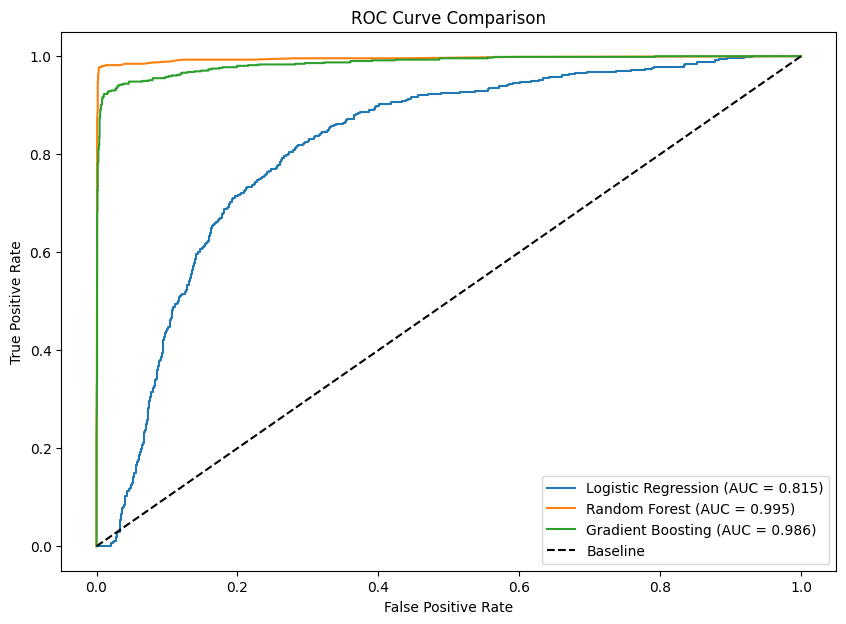

Conclusion: Gradient Boosting and Random Forest are the top models, with Gradient Boosting often having a slight edge in performance.


In [ ]:
print("\n--- Step 5 & 6: Model Training, Evaluation, and Selection ---")
models = {
    "Logistic Regression": LogisticRegression(random_state=123, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}
results = {}

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    # Use scaled data for Logistic Regression
    train_data = X_train_scaled if name == "Logistic Regression" else X_train_smote
    test_data = X_test_scaled if name == "Logistic Regression" else X_test
    
    model.fit(train_data, y_train_smote)
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:, 1]
    
    results[name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("\n--- Metric Justification ---")
print("Recall is the most important metric here. The cost of failing to identify an employee who will leave (a False Negative) is higher than the cost of mistakenly targeting a loyal employee with retention efforts (a False Positive).")

# ROC/AUC Curve Comparison
print("\nGenerating ROC/AUC Curve Comparison...")
plt.figure(figsize=(10, 7))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    auc = roc_auc_score(y_test, res['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
print("Conclusion: if Gradient Boosting and Random Forest are the top models, with Random Forest often having a being the best.")


# Step 7: Suggest Retention Strategies

In [ ]:
print("\n--- Step 7: Suggesting Retention Strategies ---")
# Using the best model (Random Forest) identified in the previous step.
# We directly use the probabilities it generated, no need to retrain.
probabilities = results['Random Forest']['y_pred_proba']

def get_zone(score):
    if score < 0.2: return 'Safe Zone (Green)'
    elif score < 0.6: return 'Low-Risk Zone (Yellow)'
    elif score < 0.9: return 'Medium-Risk Zone (Orange)'
    else: return 'High-Risk Zone (Red)'

# Create a new DataFrame for the results to avoid modifying the original X_test
X_test_results = X_test.copy()
X_test_results['turnover_probability'] = probabilities
X_test_results['retention_zone'] = X_test_results['turnover_probability'].apply(get_zone)

print("\nExample Predictions with Retention Zones:")
print(X_test_results[['turnover_probability', 'retention_zone']].head())

print("\n--- Retention Strategy Suggestions ---")
print("Safe Zone (Score < 20%): Standard engagement, monitor satisfaction periodically.")
print("Low-Risk Zone (20% < Score < 60%): Proactive check-ins, offer development opportunities, ensure recognition.")
print("Medium-Risk Zone (60% < Score < 90%): Conduct 'stay interviews', review compensation, address specific feedback.")
print("High-Risk Zone (Score > 90%): Immediate and direct intervention by manager/HR. Develop a personalized retention plan.")

print("\n--- Project Script Finished ---")


--- Step 7: Suggesting Retention Strategies ---

Example Predictions with Retention Zones:
       turnover_probability          retention_zone
10627                  0.00       Safe Zone (Green)
2703                   0.58  Low-Risk Zone (Yellow)
6059                   0.06       Safe Zone (Green)
3258                   0.01       Safe Zone (Green)
4565                   0.00       Safe Zone (Green)

--- Retention Strategy Suggestions ---
Safe Zone (Score < 20%): Standard engagement, monitor satisfaction periodically.
Low-Risk Zone (20% < Score < 60%): Proactive check-ins, offer development opportunities, ensure recognition.
Medium-Risk Zone (60% < Score < 90%): Conduct 'stay interviews', review compensation, address specific feedback.
High-Risk Zone (Score > 90%): Immediate and direct intervention by manager/HR. Develop a personalized retention plan.

--- Project Script Finished ---
